Compare 2k and 10K analysis of MBAs, to see what differences might be there. 
Also look at all populations of objects, to see typical nobs and arc lengths.

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from moSlicer import MoSlicer
import moMetrics as m
from moSummaryMetrics import ValueAtHMetric
import moPlots as moPlots
import moMetricBundle as mmb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.db as db

In [2]:
slicers = {}
objtypes = ['mba_10k', 'mba_2k']

In [3]:
obj = 'mba_2k'
Hrange = np.arange(13, 27, 1)
orbitfile = 'ssm_2k/mbas_2k.des'
obsfile = 'ssm_2k/mbas_2k_allObs.txt'
slicers[obj] = MoSlicer(orbitfile, Hrange=Hrange)
slicers[obj].readObs(obsfile)

In [4]:
obj = 'mba_10k'
orbitfile = 'mbas_10k.des'
obsfile = 'mbas_10k_allObs.txt'
slicers[obj] = MoSlicer(orbitfile, Hrange=Hrange)
slicers[obj].readObs(obsfile)

In [5]:
runName = 'enigma_1189'

In [6]:
allBundles = {}

for obj in objtypes:
    mbundles = {}
    slicer = slicers[obj]
    plotDict = {}
    pandasConstraint = None
    metadata = obj
    metric = m.NObsMetric()
    mbundles['NObs'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                          runName=runName, metadata=metadata, plotDict=plotDict)
    metric = m.DiscoveryChancesMetric()
    mbundles['Discoveries'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                   runName=runName, metadata=metadata, plotDict=plotDict)

    metric = m.ObsArcMetric()
    mbundles['Arclength'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                              runName=runName, metadata=metadata, plotDict=plotDict)
    metric = m.NNightsMetric()
    mbundles['NNights'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                            runName=runName, metadata=metadata, plotDict=plotDict)
    allBundles[obj] = mbundles

In [8]:
outDir = 'mba_comp'
resultsDb = db.ResultsDb(outDir=outDir)
for obj in objtypes:
    mbg = mmb.MoMetricBundleGroup(allBundles[obj], outDir=outDir, resultsDb=resultsDb)
    mbg.runAll()
    discovery = allBundles[obj]['Discoveries']
    completeness = discovery.reduceMetric(discovery.metric.reduceFuncs['Completeness'])
    allBundles[obj]['completeness'] = completeness
    completenessInt = completeness.reduceMetric(completeness.metric.reduceFuncs['CumulativeH'])
    allBundles[obj]['completenessInt'] = completenessInt

Calculated all metrics.
Calculated all metrics.


1

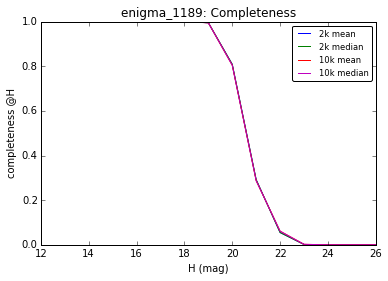

In [26]:
ph = plots.PlotHandler()
plotFunc = moPlots.MetricVsH()
mplot = 'completeness'
ph.setMetricBundles([allBundles['mba_2k'][mplot], allBundles['mba_2k'][mplot],
                     allBundles['mba_10k'][mplot], allBundles['mba_10k'][mplot]])
ph.setPlotDicts([{'color':'b', 'npReduce':np.mean, 'label':'2k mean'}, 
                 {'color':'g', 'npReduce':np.median, 'label':'2k median'},
                {'color':'r', 'npReduce':np.mean, 'label':'10k mean'}, 
                {'color':'m', 'npReduce':np.median, 'label':'10k median'}])
ph.plot(plotFunc=plotFunc, plotDicts={'ylabel':'%s @H' %(mplot)})

In [22]:
Hmark = 18.0
summaryMetric = ValueAtHMetric(Hmark=Hmark)
allBundles['mba_10k']['completeness'].setSummaryMetrics(summaryMetric)
allBundles['mba_10k']['completeness'].computeSummaryStats()
print np.mean(allBundles['mba_10k']['completeness'].summaryValues['Value At H=%.1f' %(Hmark)])

0.999799979998


{'MetricVsH': 1}

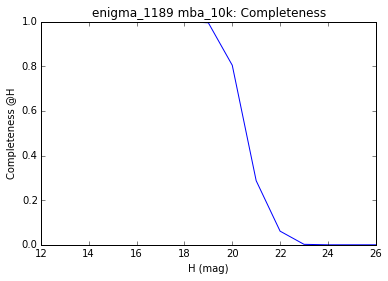

In [23]:
allBundles['mba_10k']['completeness'].plot()

In [2]:
# Go through all types of objects, with 2k results. 
moslicers = {}
objtypes = ['neos', 'mbas', 'trojans', 'tnos', 'sdos', 'comets']
Hrange = np.arange(5, 27, 0.25)
for obj in objtypes:
    orbitfile = os.path.join('ssm_2k', obj+'_2k.des')
    moslicers[obj] = MoSlicer(orbitfile, Hrange)
    obsfile = os.path.join('ssm_2k', obj+'_2k_allObs.txt')
    moslicers[obj].readObs(obsfile)

In [3]:
runName = 'enigma_1189'
allBundles = {}
for obj in objtypes:
    mbundles = {}
    slicer = moslicers[obj]
    plotDict = {}
    pandasConstraint = None
    metadata = obj
    metric = m.NObsMetric()
    mbundles['NObs'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                          runName=runName, metadata=metadata, plotDict=plotDict)
    metric = m.NObsNoSinglesMetric()
    mbundles['NObs NoSingles'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                          runName=runName, metadata=metadata, plotDict=plotDict)
    metric = m.DiscoveryChancesMetric()
    mbundles['Discoveries'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint, 
                                   runName=runName, metadata=metadata, plotDict=plotDict)

    metric = m.ObsArcMetric()
    mbundles['Arclength'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                              runName=runName, metadata=metadata, plotDict=plotDict)
    metric = m.NNightsMetric()
    mbundles['N Nights'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                            runName=runName, metadata=metadata, plotDict=plotDict)
    window = 180.0
    metric = m.ActivityOverTimeMetric(window, metricName='Chances of Detecting Activity lasting %.0f days' %(window))
    mbundles['Chance of Detecting Activity (6 mnth)'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                                runName=runName, metadata=metadata, plotDict=plotDict)
    window = 90.
    metric = m.ActivityOverTimeMetric(window, metricName='Chances of Detecting Activity lasting %0.f days' %(window))
    mbundles['Chance of Detecting Activity (3 mnth)'] = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                                runName=runName, metadata=metadata, plotDict=plotDict)
    allBundles[obj] = mbundles

In [4]:
outDir = 'ssm_2k_comp'
resultsDb = db.ResultsDb(outDir=outDir)
for obj in objtypes:
    mbg = mmb.MoMetricBundleGroup(allBundles[obj], outDir=outDir, resultsDb=resultsDb)
    mbg.runAll()
    discovery = allBundles[obj]['Discoveries']
    completeness = discovery.reduceMetric(discovery.metric.reduceFuncs['Completeness'])
    allBundles[obj]['completeness'] = completeness
    completenessInt = completeness.reduceMetric(completeness.metric.reduceFuncs['CumulativeH'])
    allBundles[obj]['completenessInt'] = completenessInt

Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.


In [5]:
plotdicts = {}
plotdicts['neos'] = {'color':'b', 'label':'NEOs'}
plotdicts['mbas'] = {'color':'g', 'label':'MBAs'}
plotdicts['trojans'] = {'color':'y', 'label':'Jup. Trojans'}
plotdicts['tnos'] = {'color':'r', 'label':'TNOs'}
plotdicts['sdos'] = {'color':'m', 'label':'SDOs'}
plotdicts['comets'] = {'color':'k', 'label':'Comets'}

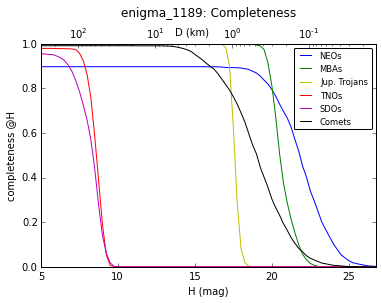

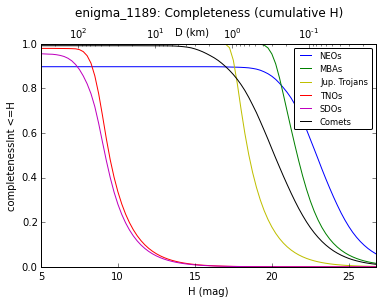

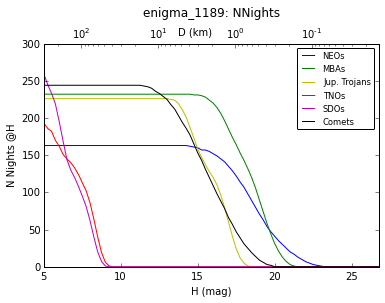

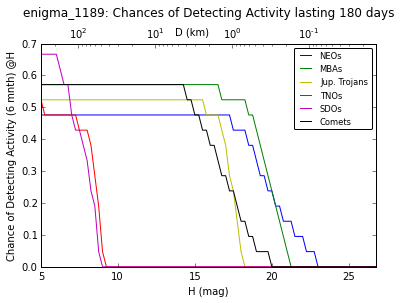

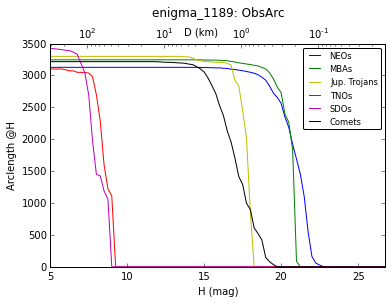

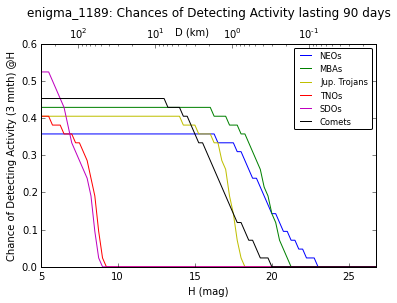

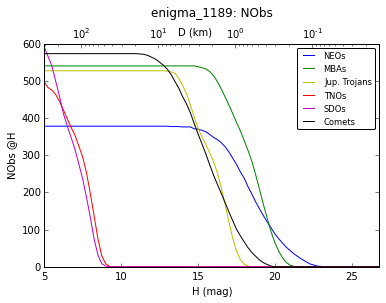

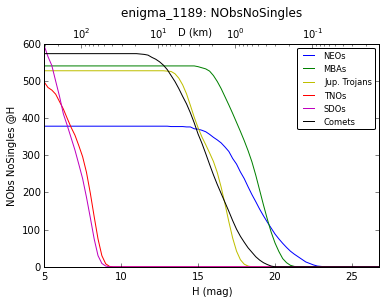

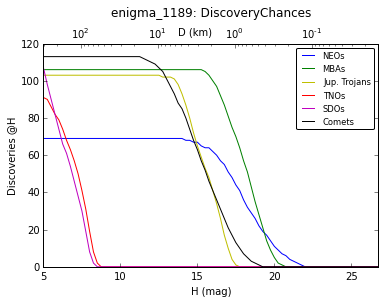

In [68]:
reload(moPlots)
for mplot in allBundles['neos'].keys():
    ph = plots.PlotHandler(outDir=outDir)
    plotFunc = moPlots.MetricVsH()
    mbundles = []
    pds = []
    for obj in objtypes:
        mbundles.append(allBundles[obj][mplot])
        pds.append(plotdicts[obj])
    ph.setMetricBundles(mbundles)
    ph.setPlotDicts(pds)
    ylabel = '%s %s' %(mplot, mbundles[0].plotDict['units'])
    ph.plot(plotFunc=plotFunc, plotDicts={'npReduce':np.median, 'ylabel':ylabel, 'albedo':0.14,
                                         'xMin':Hrange[0], 'xMax':Hrange[-1]})

In [72]:
mval = 'Arclength'
Hmark = 19.0
summaryMetric = ValueAtHMetric(Hmark=Hmark)
for obj in objtypes:
    allBundles[obj][mval].setSummaryMetrics(summaryMetric)
    allBundles[obj][mval].computeSummaryStats()
    print obj, Hmark, mval, np.median(allBundles[obj][mval].summaryValues['Value At H=%.1f' %(Hmark)])/365.25

neos 19.0 Arclength 8.01189406708
mbas 19.0 Arclength 8.49528411773
trojans 19.0 Arclength 0.0
tnos 19.0 Arclength 0.0
sdos 19.0 Arclength 0.0
comets 19.0 Arclength 0.398961557837


In [69]:
mag_sun = -27.1 
km_per_au = 1.496e8
albedo = 0.14
diameter = 2.0 * np.sqrt(10**((mag_sun - Hrange - 2.5*np.log10(albedo))/2.5))
diameter = diameter * km_per_au
for H, d in zip(Hrange, diameter):
    print H, d

5.0 304.016791546
5.25 270.955250674
5.5 241.489121355
5.75 215.227405957
6.0 191.821627471
6.25 170.961205438
6.5 152.369334731
6.75 135.799312522
7.0 121.031264683
7.25 107.869228192
7.5 96.1385508222
7.75 85.6835736111
8.0 76.3655653635
8.25 68.0608817714
8.5 60.6593247289
8.75 54.0626800712
9.0 48.1834143315
9.25 42.9435132254
9.5 38.2734464489
9.75 34.1112450532
10.0 30.4016791546
10.25 27.0955250674
10.5 24.1489121355
10.75 21.5227405957
11.0 19.1821627471
11.25 17.0961205438
11.5 15.2369334731
11.75 13.5799312522
12.0 12.1031264683
12.25 10.7869228192
12.5 9.61385508222
12.75 8.56835736111
13.0 7.63655653635
13.25 6.80608817714
13.5 6.06593247289
13.75 5.40626800712
14.0 4.81834143315
14.25 4.29435132254
14.5 3.82734464489
14.75 3.41112450532
15.0 3.04016791546
15.25 2.70955250674
15.5 2.41489121355
15.75 2.15227405957
16.0 1.91821627471
16.25 1.70961205438
16.5 1.52369334731
16.75 1.35799312522
17.0 1.21031264683
17.25 1.07869228192
17.5 0.961385508222
17.75 0.856835736111
18.0